# Exercici 1

Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

## Resposta 

L'access log d'Akumenius te el format següent:

"%n %h %l %u %t \"%r\" %>s %b \"%{Referer}i\" \"%{User-agent}i\" %v" 

On: 
- '%n' és el nom del servidor
- '%h' és l'adreça IP del client
- '%l' és la identitat del client determinada per identd a la màquina del client. Retorna - si la informació no està disponible
- '%u' és l'userID del client si la sol·licitud ha estat autenticada
- '%t' és la data, hora i zona horària en què s'ha rebut la sol·licitud
- '\"%r\"' és la línia de sol·licitud que inclou el mètode HTTP utilitzat, la ruta del recurs sol·licitat i el protocol HTTP utilitzat pel client
- '%>s' és el códi d'estat que el servidor torna al client
- '%b' és la mida de l'objecte sol·licitat
- '\"%{Referer}i\"' és la pàgina o lloc web des d'on el client diu haver sigut referit
- '\"%{User-agent}i\"' és la informació d'identificació que el navegador client reporta sobre ell mateix
- '%v' és el log virtual

Fonts d'informació:
 - https://www.keycdn.com/support/apache-access-log
 - https://httpd.apache.org/docs/2.4/logs.html

In [1]:
import pandas as pd
import numpy as np

data = "Web_access_log-akumenius.com.txt"

In [2]:
df = pd.read_csv(data, delimiter = "\t", header=None, names=['Servidor'])

In [3]:
df

,Servidor
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


In [4]:
new = df['Servidor'].str.split(" ", n = 1, expand = True)
df['Servidor'] = new[0]
df['IP'] = new[1]

In [5]:
new2 = df['IP'].str.split(" ", n = 1, expand = True)
df['IP'] = new2[0]
df['Opciones'] = new2[1]

In [6]:
new3 = df['Opciones'].str.split(" ", n = 1, expand = True)
df['Identd client'] = new3[0]
df['Opciones'] = new3[1]

In [7]:
new4 = df['Opciones'].str.split(" ", n = 1, expand = True)
df['UserID'] = new4[0]
df['Opciones'] = new4[1]

In [8]:
new5 = df['Opciones'].str.split(" \"", n = 1, expand = True)
df['Timestamp'] = new5[0]
df['Opciones'] = new5[1]

In [9]:
new6 = df['Opciones'].str.split("\" ", n = 1, expand = True)
df['Request line'] = new6[0]
df['Opciones'] = new6[1]

In [10]:
new7 = df['Opciones'].str.split(" ", n = 1, expand = True)
df['Status code'] = new7[0]
df['Opciones'] = new7[1]

In [11]:
new8 = df['Opciones'].str.split(" ", n = 1, expand = True)
df['Size obj. req.'] = new8[0]
df['Opciones'] = new8[1]

In [12]:
new9 = df['Opciones'].str.split(" \"", n = 1, expand = True)
df['Referer'] = new9[0]
df['User-Agent'] = new9[1]
df = df.drop(columns = ['Opciones'])

In [13]:
new10 = df['User-Agent'].str.split("\" ", n = 1, expand = True)
df['User-Agent'] = new10[0]
df['Vlog'] = new10[1]

# Exercici 2

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [14]:
df1 = df.copy()

### Eliminem les variables que no aporten informació

In [15]:
# Com que Identd client i Vlog no aporten cap informació, les eliminem del df
df1['Identd client'].value_counts()
df1['Vlog'].value_counts()
df1 = df1.drop(columns = ['Identd client', 'Vlog'])
df1

,Servidor,IP,UserID,Timestamp,Request line,Status code,Size obj. req.,Referer,User-Agent
0,localhost,127.0.0.1,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
1,localhost,127.0.0.1,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
2,localhost,127.0.0.1,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
3,localhost,127.0.0.1,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
4,localhost,127.0.0.1,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,-,[02/Mar/2014:03:05:39 +0100],GET / HTTP/1.1,200,7528,"""-""",Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,-,[02/Mar/2014:03:09:52 +0100],HEAD / HTTP/1.1,200,-,"""-""",Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,-,[02/Mar/2014:03:10:18 +0100],OPTIONS * HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
261871,localhost,127.0.0.1,-,[02/Mar/2014:03:10:18 +0100],OPTIONS * HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)


### Dividim el Timestamp en diferents columnes per poder filtrar per any, mes, dia, hora

In [16]:
 df1['Timestamp'].value_counts()

[28/Feb/2014:04:16:25 +0100]    83
[25/Feb/2014:18:01:20 +0100]    76
[25/Feb/2014:18:36:30 +0100]    68
[25/Feb/2014:15:58:34 +0100]    67
[26/Feb/2014:17:36:25 +0100]    67
                                ..
[24/Feb/2014:04:31:35 +0100]     1
[23/Feb/2014:15:52:57 +0100]     1
[25/Feb/2014:08:40:24 +0100]     1
[23/Feb/2014:18:44:00 +0100]     1
[24/Feb/2014:05:43:42 +0100]     1
Name: Timestamp, Length: 118735, dtype: int64

In [17]:
time = df1['Timestamp'].str.split(" ", n = 1, expand = True)
df1['Timestamp'] = time[0]
df1['Zone'] = time[1]

#### Com que totes les dates son a la mateixa zona horaria (UTC + 1) podem eliminar la columna

In [18]:
df1['Zone'].value_counts()

+0100]    261873
Name: Zone, dtype: int64

In [19]:
df1 = df1.drop(columns = ['Zone'])

#### Creem noves columnes per al dia, el mes, l'any i l'hora i eliminem la columna de Timestamp

In [20]:
df1['Dia'] = df1['Timestamp'].apply(lambda x:x[1:3])
df1['Mes'] = df1['Timestamp'].apply(lambda x:x[4:7])
df1['Any'] = df1['Timestamp'].apply(lambda x:x[8:12])
df1['Hora'] = df1['Timestamp'].apply(lambda x:x[13:15])
df1['Minut'] = df1['Timestamp'].apply(lambda x:x[16:18])
df1 = df1.drop(columns = ['Timestamp'])

#### Creem noves columnes per al verb, página i mètode HTTP utilitzat per fer la sol·licitud

In [21]:
df1['Request line'].value_counts()

OPTIONS * HTTP/1.0                                                                              13892
POST /destinos-get HTTP/1.1                                                                      8056
POST /hotel-list-data/ HTTP/1.1                                                                  2318
GET / HTTP/1.1                                                                                   2216
HEAD / HTTP/1.1                                                                                  1723
                                                                                                ...  
GET /destinosEstrelles/hoteles-en-Harlech_REINO%20UNIDO-con-1-estrella HTTP/1.1                     1
GET /destinos-caracteristicas/hoteles-baratos-en-Aguilas_ESPA%C3%91A-con-Bar-es HTTP/1.1            1
GET /hoteles-baratos/ofertas-hotel-Legend--en-PORT%20DICKSON-3231697t-destinos.html HTTP/1.1        1
GET /destinos-ajax2/hoteles-en-ESLOVENIA_SI HTTP/1.1                              

In [22]:
# Creem la columna amb el verb
metod1 = df1['Request line'].str.split(" ", n = 1, expand = True)
df1['Metod (verb)'] = metod1[0]
df1['Request line'] = metod1[1]

In [23]:
df1['Metod (verb)'].value_counts()

GET                  229482
POST                  16669
OPTIONS               13892
HEAD                   1788
-                        37
\x80w\x01\x03\x01         5
Name: Metod (verb), dtype: int64

In [24]:
df1['Metod (verb)'][df1['Metod (verb)'].str.startswith('\\')]

122077    \x80w\x01\x03\x01
196635    \x80w\x01\x03\x01
246949    \x80w\x01\x03\x01
255719    \x80w\x01\x03\x01
255830    \x80w\x01\x03\x01
Name: Metod (verb), dtype: object

In [25]:
df1['Metod (verb)'][df1['Metod (verb)'].str.startswith('\\')] = '-'

In [26]:
# Creem la columna amb la página
metod2 = df1['Request line'].str.split(" ", n = 1, expand = True)
df1['Metod (pagina)'] = metod2[0]
df1['Metod HTTP'] = metod2[1]
df1 = df1.drop(columns = ['Request line'])

In [27]:
df1

,Servidor,IP,UserID,Status code,Size obj. req.,Referer,User-Agent,Dia,Mes,Any,Hora,Minut,Metod (verb),Metod (pagina),Metod HTTP
0,localhost,127.0.0.1,-,200,-,"""-""",Apache (internal dummy connection),23,Feb,2014,03,10,OPTIONS,*,HTTP/1.0
1,localhost,127.0.0.1,-,200,-,"""-""",Apache (internal dummy connection),23,Feb,2014,03,10,OPTIONS,*,HTTP/1.0
2,localhost,127.0.0.1,-,200,-,"""-""",Apache (internal dummy connection),23,Feb,2014,03,10,OPTIONS,*,HTTP/1.0
3,localhost,127.0.0.1,-,200,-,"""-""",Apache (internal dummy connection),23,Feb,2014,03,10,OPTIONS,*,HTTP/1.0
4,localhost,127.0.0.1,-,200,-,"""-""",Apache (internal dummy connection),23,Feb,2014,03,10,OPTIONS,*,HTTP/1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,-,200,7528,"""-""",Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,02,Mar,2014,03,05,GET,/,HTTP/1.1
261869,www.akumenius.com,74.86.158.107,-,200,-,"""-""",Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,02,Mar,2014,03,09,HEAD,/,HTTP/1.1
261870,localhost,127.0.0.1,-,200,-,"""-""",Apache (internal dummy connection),02,Mar,2014,03,10,OPTIONS,*,HTTP/1.0
261871,localhost,127.0.0.1,-,200,-,"""-""",Apache (internal dummy connection),02,Mar,2014,03,10,OPTIONS,*,HTTP/1.0


In [28]:
df1 = df1[['Dia', 'Mes', 'Any', 'Hora', 'Minut','Servidor', 'IP', 'UserID', 'Metod (verb)', 'Metod (pagina)', 'Metod HTTP', 'Status code', 'Size obj. req.', 'Referer', 'User-Agent']]
df1

,Dia,Mes,Any,Hora,Minut,Servidor,IP,UserID,Metod (verb),Metod (pagina),Metod HTTP,Status code,Size obj. req.,Referer,User-Agent
0,23,Feb,2014,03,10,localhost,127.0.0.1,-,OPTIONS,*,HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
1,23,Feb,2014,03,10,localhost,127.0.0.1,-,OPTIONS,*,HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
2,23,Feb,2014,03,10,localhost,127.0.0.1,-,OPTIONS,*,HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
3,23,Feb,2014,03,10,localhost,127.0.0.1,-,OPTIONS,*,HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
4,23,Feb,2014,03,10,localhost,127.0.0.1,-,OPTIONS,*,HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,02,Mar,2014,03,05,www.akumenius.com,5.255.253.53,-,GET,/,HTTP/1.1,200,7528,"""-""",Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,02,Mar,2014,03,09,www.akumenius.com,74.86.158.107,-,HEAD,/,HTTP/1.1,200,-,"""-""",Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,02,Mar,2014,03,10,localhost,127.0.0.1,-,OPTIONS,*,HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)
261871,02,Mar,2014,03,10,localhost,127.0.0.1,-,OPTIONS,*,HTTP/1.0,200,-,"""-""",Apache (internal dummy connection)


#### Creem noves columnes per al navegador i sistema operatiu del client

In [29]:
df1['User-Agent'].value_counts()

Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)                                                                      50914
Mozilla/5.0 (X11; U; Linux i686; ca; rv:1.9.2.17) Gecko/20110428 Fedora/3.6.17-1.fc13 Firefox/3.6.17                                          13920
Apache (internal dummy connection)                                                                                                            13892
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.117 Safari/537.36                                  9388
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.117 Safari/537.36                                         7761
                                                                                                                                              ...  
Mozilla/5.0 (Linux; Android 4.2.2; GT-P5200 Build/JDQ39) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700

In [30]:
UA = df1['User-Agent'].str.split(" ", n = 1, expand = True)
df1['Navegador'] = UA[0]
df1['User-Agent'] = UA[1]

<ipython-input-30-9e662c3c3705>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Navegador'] = UA[0]
<ipython-input-30-9e662c3c3705>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['User-Agent'] = UA[1]


In [31]:
def getNav(navegador):
    if "Mozil" in navegador:
        return 'Mozilla'
    elif "Opera" in navegador:
        return 'Opera'
    elif "Safari" in navegador:
        return 'Safari'
    elif "Google" in navegador:
        return 'Google'
    elif "Apache" in navegador:
        return 'Apache'
    elif "facebook" in navegador:
        return 'Facebook'
    else:
        return 'Other'
    
def getOS(navegador):
    if "Linux" in navegador:
        return 'Linux'
    elif "Windows" in navegador:
        return 'Windows'
    elif "Mac" in navegador:
        return 'Mac'
    elif "Apple" in navegador:
        return 'Mac'
    else:
        return 'Other'    

In [32]:
df1['Navegador'] = df1['Navegador'].apply(lambda x: getNav(str(x)))
df1['OS'] = df1['User-Agent'].apply(lambda x: getOS(str(x)))
df1 = df1.drop(columns = ['User-Agent'])

<ipython-input-32-dff5c201d813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Navegador'] = df1['Navegador'].apply(lambda x: getNav(str(x)))
<ipython-input-32-dff5c201d813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OS'] = df1['User-Agent'].apply(lambda x: getOS(str(x)))


In [33]:
df1['Navegador'].value_counts()

Mozilla     242449
Apache       13902
Other         2892
Facebook      2032
Google         340
Opera          242
Safari          16
Name: Navegador, dtype: int64

#### Netegem la columna Referer

In [34]:
df1['Referer'].value_counts()

"-"                                                                                                                                                                                                                                                                                                                                                           99547
"http://www.akumenius.com/"                                                                                                                                                                                                                                                                                                                                   41394
"http://www.akumenius.com/hotel-list"                                                                                                                                                                                                                                                           

In [35]:
def Referer(navegador):
    if "akumenius.com/" in navegador:
        return 'Akumenius'
    elif "yahoo" in navegador:
        return 'Yahoo search'
    elif "google" in navegador:
        return 'Google search'
    elif "\"-\"" in navegador:
        return 'Unknown'
    else:
        return 'Other'

In [36]:
df1['Referer'] = df1['Referer'].apply(lambda x: Referer(str(x)))

In [37]:
df1['Referer'].value_counts()

Akumenius        160052
Unknown           99547
Google search      1495
Other               760
Yahoo search         19
Name: Referer, dtype: int64

#### Substituim els guions de totes les columnes per valors NaN

In [38]:
df1 = df1.replace('-', np.nan)
df1 = df1.replace('*', np.nan)

In [39]:
df1.isna().sum()

Dia                    0
Mes                    0
Any                    0
Hora                   0
Minut                  0
Servidor               0
IP                     0
UserID            261846
Metod (verb)          42
Metod (pagina)     13934
Metod HTTP            42
Status code            0
Size obj. req.     42335
Referer                0
Navegador              0
OS                     0
dtype: int64

# Exercici 3 

Geolocalitza les IP's.

#### Fem un subset de les dades, ja que el df és molt gran i la IP 127.0.0.1, com és localhost, no es pot geolocalitzar 

A més, com l'API només ens deixa fer 45 requests per minut, hem reduit el df per a que hi hagi menys de 45 IPs diferents

In [40]:
df2 = df1[df1['Servidor'] != 'localhost']
df2 = df2[df2['IP'] != '66.249.76.216']
df3 = df2[:70] 

In [41]:
df3.IP.nunique()

44

In [42]:
df3.IP.value_counts()

157.55.33.97       7
199.30.20.223      6
157.55.35.112      5
74.86.158.107      3
217.12.28.5        3
180.76.5.188       2
5.10.83.71         2
5.255.253.53       2
131.253.24.3       2
180.76.5.223       2
5.10.83.87         2
180.76.6.55        2
180.76.5.195       1
180.76.5.23        1
180.76.5.31        1
180.76.5.200       1
193.111.141.116    1
180.76.5.65        1
157.55.32.88       1
5.10.83.31         1
5.10.83.64         1
180.76.5.27        1
180.76.6.44        1
180.76.6.40        1
180.76.5.168       1
180.76.6.59        1
180.76.6.136       1
5.10.83.21         1
180.76.5.18        1
176.31.255.177     1
180.76.6.50        1
185.10.104.131     1
180.76.5.95        1
180.76.6.148       1
157.55.33.26       1
157.56.92.174      1
5.10.83.88         1
180.76.6.16        1
180.76.5.213       1
180.76.6.135       1
180.76.5.145       1
180.76.5.64        1
180.76.5.172       1
180.76.6.64        1
Name: IP, dtype: int64

In [43]:
import requests
import json

# URL de la API
api_url = "http://ip-api.com/json/"


def ip_scraping_country(ip=""):
    res = requests.get(api_url+ip)
    api_json_res = json.loads(res.content)
    country = api_json_res['country']
    return country

def ip_scraping_city(ip=""):
    res = requests.get(api_url+ip)
    api_json_res = json.loads(res.content)
    city = api_json_res['city']
    return city

In [44]:
diff = {}
for elem in df3['IP']:
    if elem not in diff.keys():
        diff[elem] = ip_scraping_country(elem)

In [45]:
import time
time.sleep(60) 

diff_city = {}
for elem in df3['IP']:
    if elem not in diff_city.keys():
        diff_city[elem] = ip_scraping_city(elem)

In [46]:
df3['Country'] = df3['IP'].apply(lambda x: diff[x])
df3['City'] = df3['IP'].apply(lambda x: diff_city[x])

<ipython-input-46-00a32617ddec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Country'] = df3['IP'].apply(lambda x: diff[x])
<ipython-input-46-00a32617ddec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['City'] = df3['IP'].apply(lambda x: diff_city[x])


In [47]:
df3

,Dia,Mes,Any,Hora,Minut,Servidor,IP,UserID,Metod (verb),Metod (pagina),Metod HTTP,Status code,Size obj. req.,Referer,Navegador,OS,Country,City
36,23,Feb,2014,03,10,www.akumenius.com,5.255.253.53,NaN,GET,/destinos-baratos/hoteles-baratos/ofertas-hote...,HTTP/1.1,404,3100,Unknown,Mozilla,Other,Russia,Moscow
41,23,Feb,2014,03,11,www.akumenius.com,157.55.35.112,NaN,GET,/destinos-baratos/destinos-caracteristicas/hot...,HTTP/1.1,200,14818,Unknown,Mozilla,Other,United States,Newark
44,23,Feb,2014,03,11,www.akumenius.com,193.111.141.116,NaN,GET,/hoteles-baratos/ofertas-hotel-Roque-Monica-Ap...,HTTP/1.1,404,17750,Unknown,Mozilla,Linux,Germany,Düsseldorf
68,23,Feb,2014,03,11,www.akumenius.com,5.10.83.71,NaN,GET,/destinosEstrelles/hoteles-en-Abingdon_ESTADOS...,HTTP/1.1,200,8835,Unknown,Mozilla,Other,Netherlands,Amsterdam
69,23,Feb,2014,03,11,www.akumenius.com,180.76.5.223,NaN,GET,/destinos-baratos/hoteles-en-TlaxcalaMEXICO_,HTTP/1.1,200,7630,Unknown,Mozilla,Other,China,Beijing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,23,Feb,2014,03,23,www.akumenius.com,74.86.158.107,NaN,HEAD,/,HTTP/1.1,200,NaN,Unknown,Mozilla,Other,United States,Dallas
526,23,Feb,2014,03,23,www.akumenius.com,5.10.83.87,NaN,GET,/destinos-baratos/hoteles-en-Bagnolo%20Piemont...,HTTP/1.1,200,7648,Unknown,Mozilla,Other,Netherlands,Amsterdam
554,23,Feb,2014,03,23,www.akumenius.com,180.76.6.59,NaN,GET,/destinos-baratos/destinos-caracteristicas/hot...,HTTP/1.1,200,7179,Unknown,Mozilla,Other,China,Beijing
559,23,Feb,2014,03,24,www.akumenius.com,157.55.33.26,NaN,GET,/destinos-baratos/destinos-caracteristicas/hot...,HTTP/1.1,200,13587,Unknown,Mozilla,Other,United States,Newark


# Exercici 4

Mostra'm la teva creativitat.
Sorprèn-me fent un pas més enllà amb l'anàlisi anterior.

### Fem visualitzacions amb l'últim df

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df4 = df3.copy()

In [50]:
df4

,Dia,Mes,Any,Hora,Minut,Servidor,IP,UserID,Metod (verb),Metod (pagina),Metod HTTP,Status code,Size obj. req.,Referer,Navegador,OS,Country,City
36,23,Feb,2014,03,10,www.akumenius.com,5.255.253.53,NaN,GET,/destinos-baratos/hoteles-baratos/ofertas-hote...,HTTP/1.1,404,3100,Unknown,Mozilla,Other,Russia,Moscow
41,23,Feb,2014,03,11,www.akumenius.com,157.55.35.112,NaN,GET,/destinos-baratos/destinos-caracteristicas/hot...,HTTP/1.1,200,14818,Unknown,Mozilla,Other,United States,Newark
44,23,Feb,2014,03,11,www.akumenius.com,193.111.141.116,NaN,GET,/hoteles-baratos/ofertas-hotel-Roque-Monica-Ap...,HTTP/1.1,404,17750,Unknown,Mozilla,Linux,Germany,Düsseldorf
68,23,Feb,2014,03,11,www.akumenius.com,5.10.83.71,NaN,GET,/destinosEstrelles/hoteles-en-Abingdon_ESTADOS...,HTTP/1.1,200,8835,Unknown,Mozilla,Other,Netherlands,Amsterdam
69,23,Feb,2014,03,11,www.akumenius.com,180.76.5.223,NaN,GET,/destinos-baratos/hoteles-en-TlaxcalaMEXICO_,HTTP/1.1,200,7630,Unknown,Mozilla,Other,China,Beijing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,23,Feb,2014,03,23,www.akumenius.com,74.86.158.107,NaN,HEAD,/,HTTP/1.1,200,NaN,Unknown,Mozilla,Other,United States,Dallas
526,23,Feb,2014,03,23,www.akumenius.com,5.10.83.87,NaN,GET,/destinos-baratos/hoteles-en-Bagnolo%20Piemont...,HTTP/1.1,200,7648,Unknown,Mozilla,Other,Netherlands,Amsterdam
554,23,Feb,2014,03,23,www.akumenius.com,180.76.6.59,NaN,GET,/destinos-baratos/destinos-caracteristicas/hot...,HTTP/1.1,200,7179,Unknown,Mozilla,Other,China,Beijing
559,23,Feb,2014,03,24,www.akumenius.com,157.55.33.26,NaN,GET,/destinos-baratos/destinos-caracteristicas/hot...,HTTP/1.1,200,13587,Unknown,Mozilla,Other,United States,Newark


#### Nombre de requests per país i ciutat

Text(0.5, 1.0, 'Nombre de visites per país i ciutat')

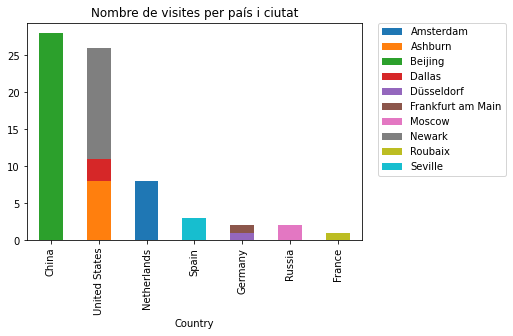

In [77]:
df_plot = df4.groupby(['Country', 'City']).size().reset_index().pivot(columns='City', index='Country', values=0)
df_plot = df_plot.reindex(['China', 'United States', 'Netherlands', 'Spain', 'Germany', 'Russia', 'France'])
df_plot.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Nombre de requests per país i ciutat')

#### El navegador més utilitzat és Mozilla, amb un sistema operatiu diferent de Linux i Windows

(array([0, 1]), [Text(0, 0, 'Mozilla'), Text(1, 0, 'Other')])

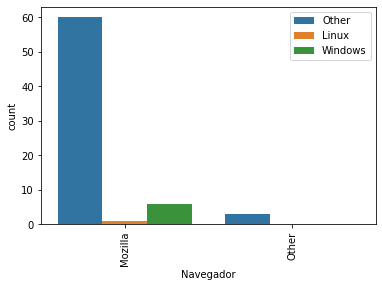

In [98]:
ax = sns.countplot(x='Navegador',
                   hue='OS',
                   data=df4)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

#### Minut amb més requests

Tots els registres que disposem son del mateix dia a la mateixa hora, pero podem veure en quin minut se'n van fer més.

Podem observar dos pics en els minuts 16 i 18 

Text(0.5, 1.0, 'Nombre de requests per minut')

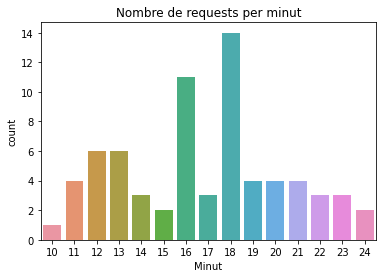

In [92]:
ax = sns.countplot(x='Minut',
                   data=df4)
plt.title('Nombre de requests per minut')